---
##### Project in Machine learning
---
# Predicting car prices
-  **Optimising hyperparameters: k value and feature selection**
-  **k-nearest neighbors *knn* algorithm**

### Introduction
The aim in this project is to use the data on cars to create optimum model that will be able to predict price. This optimisation will include both looking at various possibilities of k, as well as looking at various possibilities of attributes ***feature selection***. By this optimisation, we would try to reduce the root mean squared error of predicted value. 

The features available in the data are following attributes of cars, normalized losses, wheel base, length, width, height, curb weight, bore, stroke, compression rate, horsepower, peak rpm, city mpg, highway mpg. 

There are few more features, but we will stick to these ones because these are numeric. We will normalise these numeric values and then use in modelling through **scikit-learn** *KNeighborsRegressor*.

In [1]:
import pandas as pd
import numpy as np


In [2]:
# Prepare list of column labels that are documented outside data file
column_names = ['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration', 'num_of_doors', 'body_style', 
        'drive_wheels', 'engine_location', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type', 
        'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_rate', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']

#### Overview of data table
This data on cars includes 26 columns, last one being the price. Therefore it can have upto 25 attributes. However for modelling we can use numeric type only. Next, we select the attributes which are numeric.

In [3]:
cars = pd.read_csv('imports-85.data', names=column_names) 
cars

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_rate,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.00,160,5500,16,22,?


#### Numeric columns

We now have table reduced to attributes only which are numeric and the price column. 

In [4]:
numeric_columns = ['normalized_losses', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'bore', 'stroke', 'compression_rate', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']

numeric_cars = cars[numeric_columns]

In [5]:
numeric_cars.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,bore,stroke,compression_rate,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


### Data cleaning
There are some missing values which need to resolved before data becomes ready for training. For the missing values in view, we can either remove those rows, or replace with average value of column. But for the price column, we will just remove rows which have missing values. Finally, check that there is no null values.

In [6]:
# Replace missing values denoted by '?' with numpy nan values 
numeric_cars = numeric_cars.replace('?', np.nan)

In [7]:
numeric_cars

,normalized_losses,wheel_base,length,width,height,curb_weight,bore,stroke,compression_rate,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.00,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.00,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.00,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.00,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.00,115,5500,18,22,17450
5,NaN,99.8,177.3,66.3,53.1,2507,3.19,3.40,8.50,110,5500,19,25,15250
6,158,105.8,192.7,71.4,55.7,2844,3.19,3.40,8.50,110,5500,19,25,17710
7,NaN,105.8,192.7,71.4,55.7,2954,3.19,3.40,8.50,110,5500,19,25,18920
8,158,105.8,192.7,71.4,55.9,3086,3.13,3.40,8.30,140,5500,17,20,23875
9,NaN,99.5,178.2,67.9,52.0,3053,3.13,3.40,7.00,160,5500,16,22,NaN


In [8]:
# Data type and null values
numeric_cars = numeric_cars.astype('float')
numeric_cars.isnull().sum()

normalized_losses    41
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
bore                  4
stroke                4
compression_rate      0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

In [9]:
# Drop the rows that have null price value, as price is the target for prediction
numeric_cars = numeric_cars.dropna(subset=['price'])
numeric_cars.isnull().sum()

normalized_losses    37
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
bore                  4
stroke                4
compression_rate      0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 0
dtype: int64

In [10]:
# Fill missing values in other columns with average of column, rather than discarding row
numeric_cars = numeric_cars.fillna(numeric_cars.mean())

In [11]:
numeric_cars.isnull().sum()

normalized_losses    0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
bore                 0
stroke               0
compression_rate     0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

#### Normalise
Apart from price, we will normalise all columns (features), so that data is ready for training.

In [12]:
# Normalize to between 0 and 1 - all columns except the target column
price_column_to_keep = numeric_cars['price']
numeric_cars = (numeric_cars - numeric_cars.min())/(numeric_cars.max() - numeric_cars.min())
numeric_cars['price'] = price_column_to_keep

 ## Model -  Univariate
 
 We will now begin modelling first with one feature. Let us define a function for that. It returns the *RMSE*. We are always looking to minimise the RMSE, this will help create the model for predicting price with least *error*. This function takes inputs of name of training column, name of target column and the dataframe.
 
Here we are using default value of k=5. But in next iterations we are going to try range of value of k, to find *variations of RMSE*.

And then further, we will use combinations of features, to find *variations of RMSE*.

In [13]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(training_col_name, target_col_name, df):
    # Randomize and split dataframe into train and test set
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    last_row = int(len(rand_df) / 2)
    
    train_df = rand_df.iloc[0:last_row]
    test_df = rand_df.iloc[last_row:]
    
    # Instantiate, fit model and predict, measure error
    knn = KNeighborsRegressor()
    knn.fit(train_df[[training_col_name]], train_df[target_col_name])
    prediction = knn.predict(test_df[[training_col_name]])
    mse = mean_squared_error(test_df[target_col_name], prediction)
    
    rmse = mse**0.5
    return rmse



In [14]:
# RMSE for each feature at default value of k (5)
rmse_results = {}
train_cols = numeric_cars.columns.drop('price')
for column in train_cols:
    rmse_uni_value = knn_train_test(column, 'price', numeric_cars)
    rmse_results[column] = rmse_uni_value
    
rmse_results_series = pd.Series(rmse_results)
rmse_results_series.sort_values()

horsepower           4037.037713
curb_weight          4401.118255
highway_mpg          4630.026799
width                4704.482590
city_mpg             4766.422505
length               5427.200961
wheel_base           5461.553998
compression_rate     6610.812153
bore                 6780.627785
normalized_losses    7330.197653
peak_rpm             7697.459696
stroke               8006.529545
height               8144.441043
dtype: float64

### Multiple values of *k*

Instead of default single value of k `k=5`, now we would repeat the same process but with multiple values of *k*. We have selected k from range of 1 to 9. 

The result of this shows for each column/feature, range of RMSE. From this we notice, some column give lowest error when k = 3, some give lowest when k = 5, and so on.   

In [15]:
# Modified function
def knn_train_test_k(training_col_name, target_col_name, df):
    # Randomize and split dataframe into train and test set
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    last_row = int(len(rand_df) / 2)
    
    train_df = rand_df.iloc[0:last_row]
    test_df = rand_df.iloc[last_row:]
    
    # Multiple values of k
    k_values = [1, 3, 5, 7, 9, 11]
    k_rmse = {}
    
    # Instantiate, fit model and predict, measure error
    # Loop through different k values
    for k in k_values:     
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[[training_col_name]], train_df[target_col_name])
        prediction = knn.predict(test_df[[training_col_name]])
        mse = mean_squared_error(test_df[target_col_name], prediction)
        rmse = mse**0.5
        k_rmse[k] = rmse
    
    return k_rmse

# For each column train a model and return rmse values
# rmse values are multiple because of multiple k values this time
k_rmse_results = {}
train_cols = numeric_cars.columns.drop('price')
for column in train_cols:
    rmse_uni_value = knn_train_test_k(column, 'price', numeric_cars)
    k_rmse_results[column] = rmse_uni_value
    
#k_rmse_results_series = pd.Series(k_rmse_results)
#k_rmse_results_series.sort_values()
k_rmse_results

{'bore': {1: 8602.58848450066,
  3: 6984.239489480916,
  5: 6780.627784685976,
  7: 6878.097965921532,
  9: 6866.808502038413,
  11: 6776.498149688779},
 'city_mpg': {1: 5901.143574354764,
  3: 4646.746408727155,
  5: 4766.422505090134,
  7: 5232.523034167316,
  9: 5465.209492527533,
  11: 5229.877806448927},
 'compression_rate': {1: 8087.205346523092,
  3: 7375.063685578359,
  5: 6610.812153159129,
  7: 6732.801282941515,
  9: 7024.485525463435,
  11: 7112.935404993325},
 'curb_weight': {1: 5264.290230758878,
  3: 5022.318011757233,
  5: 4401.118254793124,
  7: 4330.608104418053,
  9: 4632.044474454401,
  11: 4730.575419875025},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 8144.441042663747,
  7: 7679.598124393773,
  9: 7811.03606291223,
  11: 7773.544506771428},
 'highway_mpg': {1: 6025.594966720739,
  3: 4617.305019788554,
  5: 4630.026798588056,
  7: 4796.061440186946,
  9: 5278.358056953987,
  11: 5145.657885382418},
 'horsepower': {1: 4170.054848037801,
  3: 4020

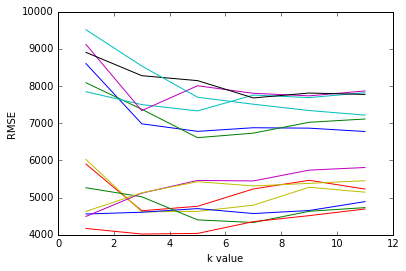

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

## Multivariate model
Finally we are going to be using multiple features instead of single feature. This will enable us to see how RMSE increases or decreases when we *vary* the *selection* of features.

First step, we will find list and sort all possible features in ascending order. 

From below we see that `horsepower, width,` and `curb weight` are top three features giving the **lowest** RMSE.

In [17]:
# Calculate average rmse for each feature/column across range of k values
feature_avg_rmse = {}

for feature, v in k_rmse_results.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[feature] = avg_rmse
       
series_avg_rmse = pd.Series(feature_avg_rmse)
sorted_series_avg_rmse = series_avg_rmse.sort_values()
print(sorted_series_avg_rmse)

sorted_features = sorted_series_avg_rmse.index


horsepower           4298.441467
width                4664.317910
curb_weight          4730.159083
highway_mpg          5082.167361
city_mpg             5206.987137
length               5222.516091
wheel_base           5345.158474
bore                 7148.143396
compression_rate     7157.217233
normalized_losses    7657.053530
peak_rpm             7969.095704
stroke               7978.039534
height               8098.379306
dtype: float64


In [18]:
sorted_features

Index(['horsepower', 'width', 'curb_weight', 'highway_mpg', 'city_mpg',
       'length', 'wheel_base', 'bore', 'compression_rate', 'normalized_losses',
       'peak_rpm', 'stroke', 'height'],
      dtype='object')

**Applying k=5 to different amounts of features** - for example 
- RMSE for two features
- RMSE for three features
- RMSE for four features

The lowest RMSE we get at *three* features.

In [19]:
# Modified function
def knn_train_test_mv(training_col_name, target_col_name, df):
    # Randomize and split dataframe into train and test set
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    last_row = int(len(rand_df) / 2)
    
    train_df = rand_df.iloc[0:last_row]
    test_df = rand_df.iloc[last_row:]
    
    k_values = [5]
    k_rmse = {}
    
    # Instantiate, fit model and predict, measure error
    # Loop through different k values
    for k in k_values:     
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[training_col_name], train_df[target_col_name])
        prediction = knn.predict(test_df[training_col_name])
        mse = mean_squared_error(test_df[target_col_name], prediction)
        rmse = mse**0.5
        k_rmse[k] = rmse
    
    return k_rmse

k_rmse_results = {}

for nr_best_feats in range(2,7):
    k_rmse_results['{} best features'.format(nr_best_feats)] = knn_train_test_mv(
        sorted_features[:nr_best_feats],
        'price',
        numeric_cars
    )

k_rmse_results


{'2 best features': {5: 3589.3132622073304},
 '3 best features': {5: 3305.9401397969677},
 '4 best features': {5: 3358.6915801682458},
 '5 best features': {5: 3341.6024539726504},
 '6 best features': {5: 3628.261188214127}}

## Hyperparameter tuning

Now the function is ready to work with ***both*** multiple features and multiple k values. From the result of this exercise of using variations of *both* `features` i.e. car attributes like horsepower, width, higway_mpg, and `k values`, we will be able to find the value for each parameter that gives best results. By results we mean least error in predicted price.

The k values range from 1 to 24, and features from 2 to 7.

In [20]:
# Modified function
def knn_train_test_hyp(training_col_name, target_col_name, df):
    # Randomize and split dataframe into train and test set
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    last_row = int(len(rand_df) / 2)
    
    train_df = rand_df.iloc[0:last_row]
    test_df = rand_df.iloc[last_row:]
    
    k_values = [i for i in range(1, 25)]
    k_rmse = {}
    
    # Instantiate, fit model and predict, measure error
    # Loop through different k values
    for k in k_values:     
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[training_col_name], train_df[target_col_name])
        prediction = knn.predict(test_df[training_col_name])
        mse = mean_squared_error(test_df[target_col_name], prediction)
        rmse = mse**0.5
        k_rmse[k] = rmse
    
    return k_rmse

k_rmse_results = {}

for nr_best_feats in range(2,7):
    k_rmse_results['{} best features'.format(nr_best_feats)] = knn_train_test_hyp(
        sorted_features[:nr_best_feats],
        'price',
        numeric_cars
    )

k_rmse_results


{'2 best features': {1: 4061.9613050304106,
  2: 3497.49936199118,
  3: 3402.8692636542114,
  4: 3587.0044198356923,
  5: 3589.3132622073304,
  6: 3680.062981095498,
  7: 3756.92796407086,
  8: 3937.770418264052,
  9: 4078.3485919700097,
  10: 4163.828373808731,
  11: 4297.135962941241,
  12: 4370.753019740529,
  13: 4500.462028689254,
  14: 4604.156707686779,
  15: 4595.345097101211,
  16: 4605.433669910023,
  17: 4611.2845838376215,
  18: 4598.88218482117,
  19: 4579.964891966457,
  20: 4653.966845712387,
  21: 4759.076059393234,
  22: 4807.805949321809,
  23: 4865.320887129985,
  24: 4910.715769042787},
 '3 best features': {1: 3013.0109985241875,
  2: 2813.285969825997,
  3: 3171.585284478674,
  4: 3182.3137417981943,
  5: 3305.9401397969677,
  6: 3522.506848900376,
  7: 3774.3772094554106,
  8: 3978.969124021116,
  9: 3992.923680588881,
  10: 4076.2381473803043,
  11: 4156.388331131807,
  12: 4201.10713385948,
  13: 4303.62676861325,
  14: 4359.693296989702,
  15: 4371.771103372868

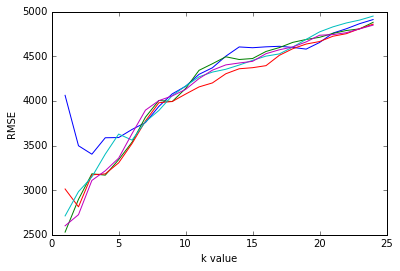

In [21]:
for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

## Summary
From the graph above we see the below hyperparameter results
- **Only best two features ** with k=3 brings lowest RMSE of 3402
- **Only best three features** with k=2 brings lowest RMSE of 2813
- ** With Four best features** with k=1 brings lowest RMSE of **2600**
- **Five best features ** with k=1 brings lowest RMSE of 2773
- **Six best features ** with k=1 brings lowest RMSE of 2711.

### Conclusion

** From the various iterations, the root mean squared error, in terms of car price, for this data is arrived at it lowest value - 2600.** 

And this takes place when model will be tuned to hyper parameter of `k = 1` and selecting Four best features - `horsepower, width, curb_weight, ` and ` highway_mpg`. 

Alternatively, selecting only best *three* instead of four features with k =2 could also be good option. 


